In [3]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [4]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)


final weight: [[ 1.39426126 -1.83204351  1.10080672]
 [-1.26910387  0.65153142  1.19813444]
 [ 0.17562534  0.31093559  0.12794364]
 [ 0.23274898  0.27252722  0.06565543]
 [-0.59906079 -0.01520003  1.30478634]]


Text(0,0.5,'loss')

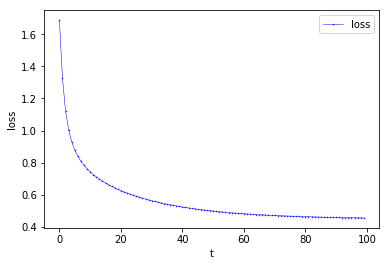

In [5]:
x = x_d5
y = y_d5

num_class = 3
y_onehot = np.zeros([n, num_class])
for i in range(n):
    y_onehot[i, y_d5[i]] += 1

w_dimension = x.shape[1]+1
lam = 0.01
learning_rate = 0.01
alpha_base = 1
num_iter = 100

loss_history = []
w_history = []


x_hat = np.hstack([x,np.ones([x.shape[0],1])])
w = np.random.uniform(size = [w_dimension, num_class])+1
y = y.reshape(-1,1)

for t in range(1,num_iter+1):
    
    y_hat = np.dot(x_hat,w)
    exp_y_hat = np.exp(y_hat)
    p = exp_y_hat / np.sum(exp_y_hat, axis=1).reshape(-1,1)
    
    loss = -1/n * np.sum(y_onehot * np.log(p)) + lam * np.sum(w*w)
    
    
    w_history.append(w)
    loss_history.append(loss)
    
    direction =  -1 / n * x_hat.T.dot(y_onehot - p) + 2 * lam * w
    w -=  direction

print("final weight:", w_history[loss_history.index(min(loss_history))])

loss_hist_batch = loss_history

plt.plot(range(len(loss_history)), loss_hist_batch, 'bo-', linewidth=0.5, markersize=0.5, label='loss')
plt.legend()
plt.xlabel('t')
plt.ylabel('loss')

final weight: [[ 6.64883882 -4.81775376  3.44957163]
 [-4.98299686  3.75137676  3.20351981]
 [ 2.0822146   2.37155703  1.80575588]
 [ 3.41142413  2.71912246  2.36511651]
 [-4.09970917 -0.91672578  3.27486753]]


Text(0,0.5,'loss')

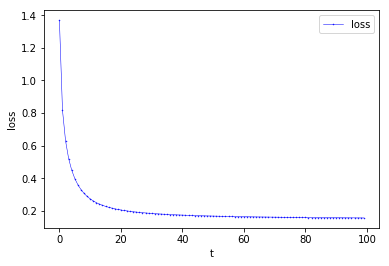

In [6]:
x = x_d5
y = y_d5

num_class = 3
y_onehot = np.zeros([n, num_class])
for i in range(n):
    y_onehot[i, y_d5[i]] += 1

w_dimension = x.shape[1]+1
lam = 0.01
learning_rate = 0.01
alpha_base = 1
num_iter = 100

loss_history = []
w_history = []


x_hat = np.hstack([x,np.ones([x.shape[0],1])])
w = np.random.uniform(size = [w_dimension, num_class])+1
y = y.reshape(-1,1)

for t in range(1,num_iter+1):
    
    y_hat = np.dot(x_hat,w)
    exp_y_hat = np.exp(y_hat)
    p = exp_y_hat / np.sum(exp_y_hat, axis=1).reshape(-1,1)
    
    loss = -1/n * np.sum(y_onehot * np.log(p)) 
    
    w_history.append(w)
    loss_history.append(loss)
    
    grad =  -1 / n * x_hat.T.dot(y_onehot - p)
    
    hess = np.zeros([num_class, w_dimension, w_dimension])
    for class_index in range(num_class):
        hess[class_index] = 1 / n * x_hat.T.dot((p[:, class_index].reshape(-1,1) * (1-p[:, class_index].reshape(-1,1)) * x_hat)) + 2 * lam 
        w[:, class_index] -= np.linalg.inv(hess[class_index]).dot(grad[:, class_index]) * 1.0/np.sqrt(t+10)
        

print("final weight:", w_history[loss_history.index(min(loss_history))])

loss_hist_newton = loss_history

plt.plot(range(len(loss_history)), loss_hist_newton, 'bo-', linewidth=0.5, markersize=0.5, label='loss')
plt.legend()
plt.xlabel('t')
plt.ylabel('loss')

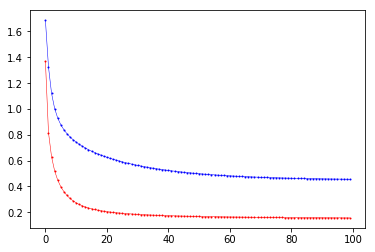

In [7]:
plt.plot(loss_hist_batch, 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(loss_hist_newton, 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()

Text(0,0.5,'diff from the gold loss')

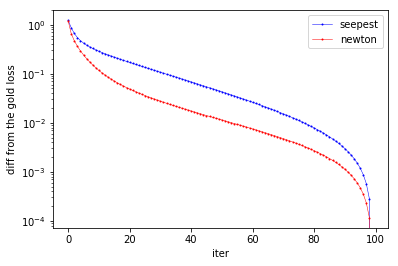

In [8]:
# diff
show_iter = 100
plt.plot(np.abs(loss_hist_batch[:show_iter] - loss_hist_batch[-1]), 'bo-', linewidth=0.5, markersize=1, label='seepest')
plt.plot(np.abs(loss_hist_newton[:show_iter] - loss_hist_newton[-1]), 'ro-', linewidth=0.5, markersize=1, label='newton')
plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from the gold loss')